In [17]:
# TCR Final Project
#Loan Eligibility using knn

In [2]:
# NAME: DEEPJYOTI DEKA

# CERTIFICATION CODE: TCRIG02R51

# EMAIL: deepjyotideka8@gmail.com

# BATCH: MACHINE LEARNING WITH PYTHON

# PROJECT NAME- Loan Status


In [3]:
import pandas as pd
import numpy as np 



In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [5]:
train = pd.read_csv('train_u6lujuX_CVtuZ9i (1).csv')


In [249]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [250]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [251]:
# Exploring the null dataset

In [252]:
train.isnull()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,False,False,False,False,False,False,False,False,True,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,False,False,False,False,False,False,False,False,False,False,False,False,False
610,False,False,False,False,False,False,False,False,False,False,False,False,False
611,False,False,False,False,False,False,False,False,False,False,False,False,False
612,False,False,False,False,False,False,False,False,False,False,False,False,False


<AxesSubplot:>

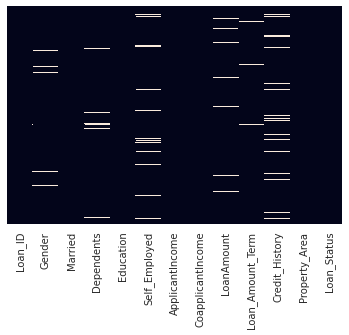

In [253]:
sns.heatmap(train.isnull() , yticklabels = False, cbar=False)

In [254]:
train = train.dropna()

In [255]:
sns.set_style("whitegrid")

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

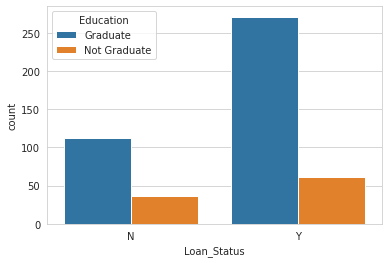

In [256]:
sns.countplot(x='Loan_Status' , hue = "Education",  data=train)

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

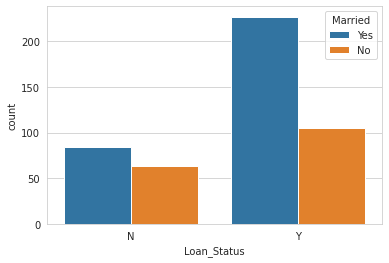

In [257]:
sns.countplot(x='Loan_Status' , hue = "Married",  data=train)

<AxesSubplot:xlabel='LoanAmount'>

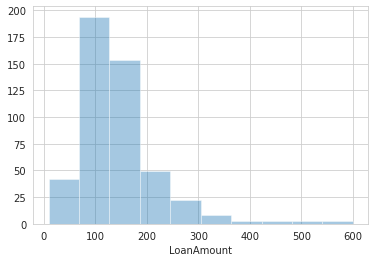

In [284]:
sns.distplot(train['LoanAmount'].dropna(),kde=False,bins=10)

<AxesSubplot:xlabel='ApplicantIncome'>

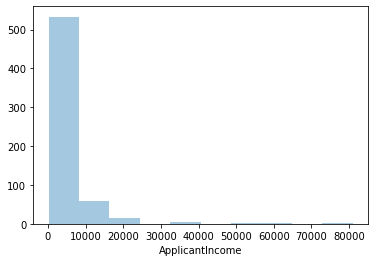

In [7]:
sns.distplot(train['ApplicantIncome'].dropna(),kde=False,bins=10)

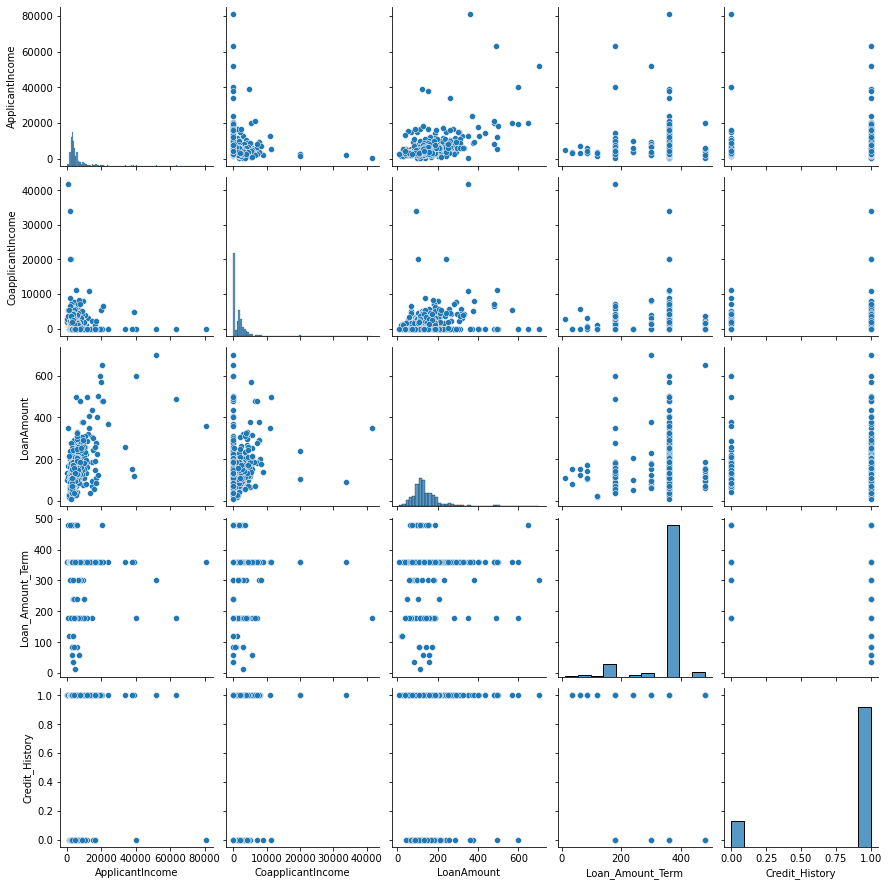

In [9]:
sns.pairplot(train)

In [260]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 480 entries, 1 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            480 non-null    object 
 1   Gender             480 non-null    object 
 2   Married            480 non-null    object 
 3   Dependents         480 non-null    object 
 4   Education          480 non-null    object 
 5   Self_Employed      480 non-null    object 
 6   ApplicantIncome    480 non-null    int64  
 7   CoapplicantIncome  480 non-null    float64
 8   LoanAmount         480 non-null    float64
 9   Loan_Amount_Term   480 non-null    float64
 10  Credit_History     480 non-null    float64
 11  Property_Area      480 non-null    object 
 12  Loan_Status        480 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 68.7+ KB


In [261]:
# converting catergorial features into dummy numbers
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [262]:
train['Self_Employed'].replace(to_replace = ['Yes' , 'No'] , value=[1,0] , inplace=True)

In [263]:
train['Married'].replace(to_replace = ['Yes' , 'No'] , value=[1,0] , inplace=True)

In [264]:
train['Loan_Status'].replace(to_replace = ['Y' , 'N'] , value=[1,0] , inplace=True)

In [265]:
education = pd.get_dummies(train['Education'] , drop_first=True)

In [266]:
gender = pd.get_dummies(train['Gender'],drop_first=True)

In [267]:
property_area = pd.get_dummies(train['Property_Area'],drop_first=True)

In [268]:
# self_employed = pd.get_dummies(train['Self_Employed'] , drop_first=True)

In [269]:
train = pd.concat([train , gender , education , property_area] , axis = 1 )


In [270]:
train.drop(['Gender' , 'Education' , 'Property_Area' ] , axis = 1  , inplace = True)

In [271]:
X=train.drop(['Loan_Status' , "Loan_ID" , 'Dependents'] , axis =1 )
y=train['Loan_Status']

In [272]:
from sklearn.model_selection import train_test_split

In [273]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.33, random_state=42)

In [274]:
from sklearn.linear_model import LogisticRegression

In [275]:
logmodel = LogisticRegression()

In [276]:
logmodel.fit(X_train , y_train )

LogisticRegression()

In [277]:
predictions = logmodel.predict(X_test)

In [278]:
from sklearn.metrics import classification_report

In [280]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.89      0.36      0.52        47
           1       0.79      0.98      0.87       112

    accuracy                           0.80       159
   macro avg       0.84      0.67      0.69       159
weighted avg       0.82      0.80      0.77       159



In [281]:
from sklearn.metrics import confusion_matrix

In [282]:
confusion_matrix(y_test , predictions)

array([[ 17,  30],
       [  2, 110]])

In [ ]:
# The accuracy of the logistic regression is about 80%